# [EDA] 了解變數分布狀態: Bar & KDE (density plot)

# To do: 變項的分群比較
1. 自 20 到 70 歲，切 11 個點，進行分群比較 (KDE plot)
2. 以年齡區間為 x, target 為 y 繪製 barplot

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將資料依照歲數, 將 20 到 70 歲切成11個區間? (In[4], Hint : 使用 numpy.linspace),  
  送入繪圖前的除了排序外, 還要注意什麼? (In[5])
- 如何調整對應資料, 以繪製長條圖(bar chart)? (In[7])

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = r'D:\成大\資料科學\百日馬拉松\D16\Part01'

In [3]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: D:\成大\資料科學\百日馬拉松\D16\Part01\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 資料整理 ( 'DAYS_BIRTH'全部取絕對值 )
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

In [5]:
# 根據年齡分成不同組別 (年齡區間 - 還款與否)
age_data = app_train[['TARGET', 'DAYS_BIRTH']] # subset
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365 # day-age to year-age

#自 20 到 70 歲，切 11 個點 (得到 10 組)
"""
Your Code Here
"""
bin_cut = np.linspace(20,70,12) 
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut) # 利用pd.cut將所有指定的數值，列出其分配在哪個範圍的bin中

# 顯示不同組的數量
print(age_data['YEARS_BINNED'].value_counts())
age_data.head()

(38.182, 42.727]    39155
(33.636, 38.182]    37238
(29.091, 33.636]    35954
(42.727, 47.273]    34796
(51.818, 56.364]    32025
(47.273, 51.818]    30586
(56.364, 60.909]    29832
(24.545, 29.091]    27723
(60.909, 65.455]    23291
(20.0, 24.545]      10324
(65.455, 70.0]       6587
Name: YEARS_BINNED, dtype: int64


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(24.545, 29.091]"
1,0,16765,45.931507,"(42.727, 47.273]"
2,0,19046,52.180822,"(51.818, 56.364]"
3,0,19005,52.068493,"(51.818, 56.364]"
4,0,19932,54.608219,"(51.818, 56.364]"


In [22]:
len(age_data['YEARS_BINNED'].unique())

11

In [15]:
year_group_sorted = age_data['YEARS_BINNED'].sort_values()
year_group_sorted

182477    (20.0, 24.545]
31585     (20.0, 24.545]
253372    (20.0, 24.545]
48615     (20.0, 24.545]
48614     (20.0, 24.545]
               ...      
185026    (65.455, 70.0]
164154    (65.455, 70.0]
120694    (65.455, 70.0]
258566    (65.455, 70.0]
8510      (65.455, 70.0]
Name: YEARS_BINNED, Length: 307511, dtype: category
Categories (11, interval[float64]): [(20.0, 24.545] < (24.545, 29.091] < (29.091, 33.636] < (33.636, 38.182] ... (51.818, 56.364] < (56.364, 60.909] < (60.909, 65.455] < (65.455, 70.0]]

In [27]:
age_data['YEARS_BINNED'].unique()

[(24.545, 29.091], (42.727, 47.273], (51.818, 56.364], (33.636, 38.182], (47.273, 51.818], ..., (20.0, 24.545], (29.091, 33.636], (65.455, 70.0], (56.364, 60.909], (60.909, 65.455]]
Length: 11
Categories (11, interval[float64]): [(20.0, 24.545] < (24.545, 29.091] < (29.091, 33.636] < (33.636, 38.182] ... (51.818, 56.364] < (56.364, 60.909] < (60.909, 65.455] < (65.455, 70.0]]

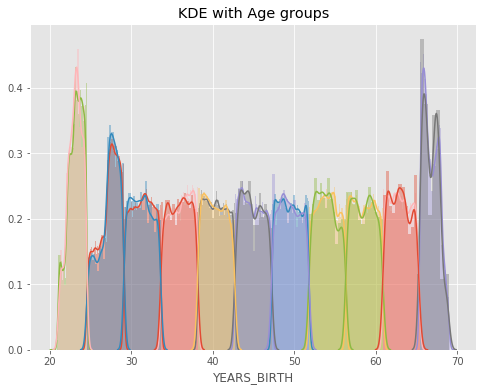

In [28]:
# 繪圖前先排序 / 分組
"""
Your Code Here
"""
year_group_sorted = age_data['YEARS_BINNED'].sort_values()

# 我不太懂 &\的用意是什麼?
# 為何不能用and的運算子
plt.figure(figsize=(8,6))
for i in range(len(age_data['YEARS_BINNED'].unique())):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == age_data['YEARS_BINNED'].unique()[i]) &\
                              (age_data['TARGET'] == 0), 'YEARS_BIRTH'], label = str(age_data['YEARS_BINNED'].unique()[i]))
    
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == age_data['YEARS_BINNED'].unique()[i]) &\
                              (age_data['TARGET'] == 1), 'YEARS_BIRTH'], label = str(age_data['YEARS_BINNED'].unique()[i]))
plt.title('KDE with Age groups')
plt.show()

In [29]:
# 計算每個年齡區間的 Target、DAYS_BIRTH與 YEARS_BIRTH 的平均值
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 24.545]",0.125533,8441.910403,23.128522
"(24.545, 29.091]",0.110883,9922.569852,27.185123
"(29.091, 33.636]",0.105412,11452.464955,31.376616
"(33.636, 38.182]",0.094688,13134.523068,35.984995
"(38.182, 42.727]",0.081394,14754.175278,40.422398
"(42.727, 47.273]",0.076589,16400.977411,44.934185
"(47.273, 51.818]",0.071896,18074.292094,49.518608
"(51.818, 56.364]",0.063107,19740.133021,54.082556
"(56.364, 60.909]",0.053701,21389.693517,58.601900


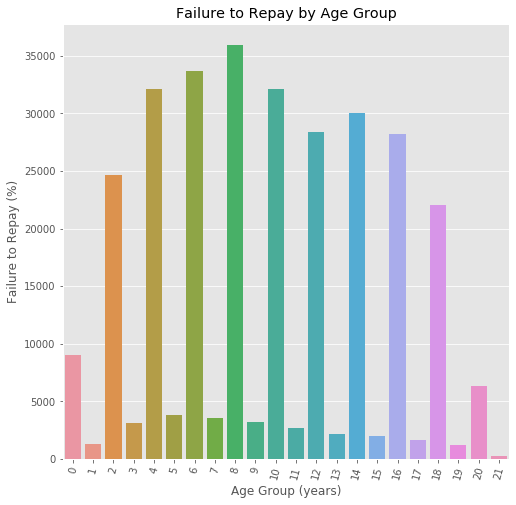

In [51]:
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""

px = np.arange(len(age_data['YEARS_BINNED'].unique())*2)
py = age_data.groupby('YEARS_BINNED')['TARGET'].value_counts()
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')

plt.title('Failure to Repay by Age Group');

In [52]:
age_data.groupby('YEARS_BINNED')['TARGET'].value_counts()

YEARS_BINNED      TARGET
(20.0, 24.545]    0          9028
                  1          1296
(24.545, 29.091]  0         24649
                  1          3074
(29.091, 33.636]  0         32164
                  1          3790
(33.636, 38.182]  0         33712
                  1          3526
(38.182, 42.727]  0         35968
                  1          3187
(42.727, 47.273]  0         32131
                  1          2665
(47.273, 51.818]  0         28387
                  1          2199
(51.818, 56.364]  0         30004
                  1          2021
(56.364, 60.909]  0         28230
                  1          1602
(60.909, 65.455]  0         22050
                  1          1241
(65.455, 70.0]    0          6363
                  1           224
Name: TARGET, dtype: int64